In [21]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn import ensemble

import warnings

import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    fbeta_score,
    make_scorer,
)
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# p much in practice:
# *if you want to use GradientBoostingClassifier
#     * use XGBClassifier instead
# *if you want to use GradientBoostingRegressor
#     * use XGBRegressor instead
from xgboost import XGBClassifier

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Gradient boost guided example

Having walked through gradient boost by hand, now let's try it with SKlearn.  We'll still use the European Social Survey Data, but now with a categorical outcome: Whether or not someone lives with a partner.

In [2]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.8)

# Put 80% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 20% in the test set.
X_test, y_test = X[offset:], y[offset:]

Since we're now working with a binary outcome, we've switched to a classifier.  Now our loss function can't be the residuals.  Our options are "deviance", or "exponential".  Deviance is used for logistic regression, and we'll try that here.

In [3]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.

# *** It's best to update this table for the drill 
#  at the end of the lesson.  ***

params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

### Evaluation of Model - Confusion Matrix Plot

based on the example here:

https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html

In [4]:
def plot_confusion_matrix(cm, classes,normalize,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


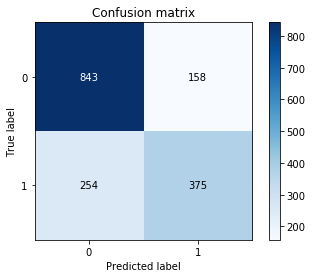

In [5]:
cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,[0,1],False)

Normalized confusion matrix


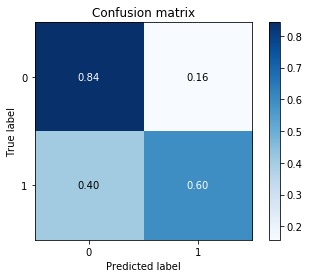

In [6]:
cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,[0,1],True)

### Accuracy

In [7]:
clf.score(X_test, y_test)

0.747239263803681

### Precision

In [8]:
y_pred = clf.predict(X_test)
precision_score(y_test,y_pred)

0.7035647279549718

### Recall

In [9]:
recall_score(y_test,y_pred)

0.5961844197138315

Unlike decision trees, gradient boost solutions are not terribly easy to interpret on the surface.  But they aren't quite a black box.  We can get a measure of how important various features are by counting how many times a feature is used over the course of many decision trees.

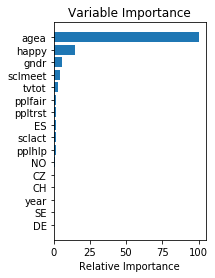

In [10]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

It appears that age and happiness are the most important features in predicting whether or not someone lives with a partner.

### DRILL: Improve this gradient boost model

While this model is already doing alright, but there is definitely room for improvement.  Your task is to see how low you can get the error rates to go in the test set, based on your model in the training set.  Strategies you might use include:

* Creating new features
* Applying more overfitting-prevention strategies like subsampling
* More iterations
* Trying a different loss function
* Changing the structure of the weak learner: Allowing more leaves in the tree, or other modifications

You can learn more about the parameters for the gradient boost model [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) and update the **params** table featured earlier, before we initialized and fit the model.

A few parameters to tune could be:
 - learning_rate
 - max_depth
 - n_estimators
 - loss
 - subsample
 - min_samples_split
 
You can then use the same metrics to evaluate your results.
          
Have fun!

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8147 entries, 0 to 8593
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     8147 non-null   int64  
 1   tvtot    8147 non-null   float64
 2   ppltrst  8147 non-null   float64
 3   pplfair  8147 non-null   float64
 4   pplhlp   8147 non-null   float64
 5   happy    8147 non-null   float64
 6   sclmeet  8147 non-null   float64
 7   sclact   8147 non-null   float64
 8   gndr     8147 non-null   float64
 9   agea     8147 non-null   float64
 10  CH       8147 non-null   uint8  
 11  CZ       8147 non-null   uint8  
 12  DE       8147 non-null   uint8  
 13  ES       8147 non-null   uint8  
 14  NO       8147 non-null   uint8  
 15  SE       8147 non-null   uint8  
dtypes: float64(9), int64(1), uint8(6)
memory usage: 747.9 KB


In [14]:
X.head()

,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,CH,CZ,DE,ES,NO,SE
0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1,0,0,0,0,0
1,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1,0,0,0,0,0
2,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,1,0,0,0,0,0
3,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1,0,0,0,0,0
4,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1,0,0,0,0,0


In [16]:
y.value_counts()

0.0    5013
1.0    3134
Name: partner, dtype: int64

In [17]:
def print_vif(x):
    import warnings
    import statsmodels.api as sm
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    """Utility for checking multicollinearity assumption
    
    :param x: input features to check using VIF. This is assumed to be a pandas.DataFrame
    :return: nothing is returned the VIFs are printed as a pandas series
    """
    # Silence numpy FutureWarning about .ptp
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        x = sm.add_constant(x)

    vifs = []
    for i in range(x.shape[1]):
        vif = variance_inflation_factor(x.values, i)
        vifs.append(vif)

    print("VIF results\n-------------------------------")
    print(pd.Series(vifs, index=x.columns))
    print("-------------------------------\n")

In [19]:
print_vif(X.drop(columns='CH'))

VIF results
-------------------------------
const      243.673899
year         1.004182
tvtot        1.177319
ppltrst      1.722175
pplfair      1.755665
pplhlp       1.449239
happy        1.162427
sclmeet      1.188475
sclact       1.138460
gndr         1.010791
agea         1.136045
CZ           1.794704
DE           1.017103
ES           1.962894
NO           1.681770
SE           1.756131
dtype: float64
-------------------------------



In [20]:
X = X.drop(columns='CH')

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
grid = {
    "learning_rate": [0.01, 0.1, 0.5],
    "n_estimators": [25, 50, 100, 150],
    "max_features": [0.25, 0.5, 0.7],
    "subsample": [0.2, 0.4,0.5,],
    "max_depth": [2,3,4, 5],
}

# Initialize and fit the model.
clf = GridSearchCV(XGBClassifier(), grid, cv=5, verbose=1, n_jobs=-1 )
clf.fit(X_train, y_train)

clf.best_params_

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 236 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 736 tasks      | elapsed:   50.4s
[Parallel(n_jobs=-1)]: Done 1436 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  2.5min finished


[15:54:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




{'learning_rate': 0.1,
 'max_depth': 4,
 'max_features': 0.25,
 'n_estimators': 100,
 'subsample': 0.5}

In [41]:
predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

In [42]:
clf.score(X_train, y_train)

0.7890133497007825

In [43]:
clf.score(X_test, y_test)

0.756441717791411

In [44]:
print(classification_report(y_train, predict_train))
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

         0.0       0.77      0.94      0.85      4023
         1.0       0.84      0.55      0.67      2494

    accuracy                           0.79      6517
   macro avg       0.81      0.74      0.76      6517
weighted avg       0.80      0.79      0.78      6517

              precision    recall  f1-score   support

         0.0       0.75      0.90      0.82       990
         1.0       0.78      0.53      0.63       640

    accuracy                           0.76      1630
   macro avg       0.76      0.72      0.72      1630
weighted avg       0.76      0.76      0.74      1630



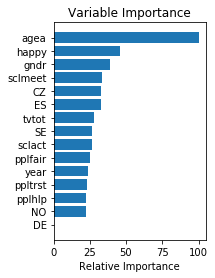

In [45]:
feature_importance = clf.best_estimator_.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()